# Spectral analysis of audio recordings
    
    @author Daniel Duke <daniel.duke@monash.edu>
    @copyright (c) 2020 LTRAC
    @license GPL-3.0+
    @version 0.0.1
    @date 24/01/2023
        __   ____________    ___    ______
       / /  /_  ____ __  \  /   |  / ____/
      / /    / /   / /_/ / / /| | / /
     / /___ / /   / _, _/ / ___ |/ /_________
    /_____//_/   /_/ |__\/_/  |_|\__________/

    Laboratory for Turbulence Research in Aerospace & Combustion (LTRAC)
    Monash University, Australia


In [87]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import soundfile
import os
%matplotlib notebook

## Part 1. Make some noise and plot the spectrogram of it

Let's generate noise and store it in a 64-bit float vector where we know there shouldn't be any problems with the data. We should get exactly the spectrum we intend.

In [113]:
# simulate 192 kHz audio signal
sampleRate = 192000 

# Make noise for 30s
whiteNoise = np.random.random(size=30*sampleRate)
time = np.arange(0,len(whiteNoise)/sampleRate,1/sampleRate)

In [114]:
# Compute spectrogram.
# - Defaults to a Tukey window with shape parameter of 0.25.
# - Default is no overlap. Set 1024 samples per window, so Nyquist condition gives 512 frequency bins.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html

f,t,S = scipy.signal.spectrogram(whiteNoise, fs=sampleRate, nperseg=1024)

print("There were %i windows evaluated in the spectrogram, each has %i frequency bands." % (S.shape[1],S.shape[0]))

# Ensemble-Average spectrum over all time record
Savg = np.nanmean(S, axis=1)

There were 6428 windows evaluated in the spectrogram, each has 513 frequency bands.


<IPython.core.display.Javascript object>


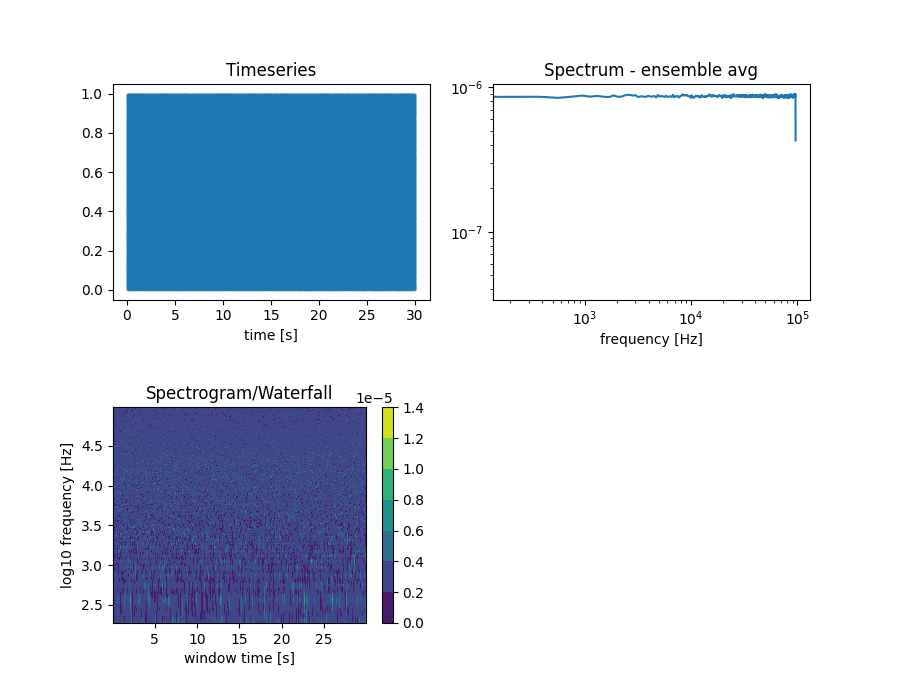

In [115]:
fig=plt.figure(figsize=(9,7))
ax=fig.add_subplot(221)
ax.scatter(time, whiteNoise, marker='.', s=.01, alpha=.1)
plt.title('Timeseries')
plt.xlabel('time [s]')

ax=fig.add_subplot(222)
ax.loglog(f, Savg)
plt.title('Spectrum - ensemble avg')
plt.xlabel('frequency [Hz]')

ax=fig.add_subplot(223)
tt,ff = np.meshgrid(t, np.log10(f[1:]))
p_=ax.contourf(tt,ff,S[1:,...])
plt.colorbar(p_)
plt.title('Spectrogram/Waterfall')
plt.ylabel('log10 frequency [Hz]')
plt.xlabel('window time [s]')

plt.subplots_adjust(hspace=.5);

## 2. Repeat the process with a chirp signal

In [116]:
# 250Hz at t=0, rising to 8710 Hz at t=5 s
signalChirp = scipy.signal.chirp(time, 250, 5., 8710, method='linear')

In [117]:
# Compute spectrogram.
# - Defaults to a Tukey window with shape parameter of 0.25.
# - Default is no overlap. Set 1024 samples per window, so Nyquist condition gives 512 frequency bins.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html

fChirp,tChirp,SChirp = scipy.signal.spectrogram(signalChirp, fs=sampleRate, nperseg=1024)

# Ensemble-Average spectrum over all time record
SavgChirp = np.nanmean(SChirp, axis=1)

<IPython.core.display.Javascript object>


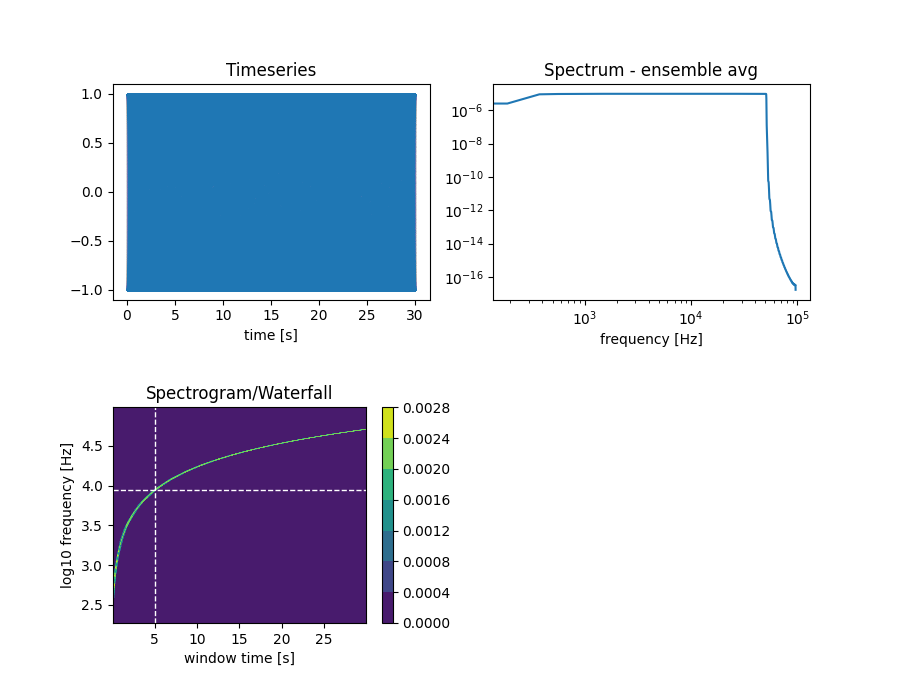

In [118]:
fig=plt.figure(figsize=(9,7))
ax=fig.add_subplot(221)
ax.scatter(time, signalChirp, marker='.', s=.01, alpha=.05)
plt.title('Timeseries')
plt.xlabel('time [s]')

ax=fig.add_subplot(222)
ax.loglog(fChirp, SavgChirp)
plt.title('Spectrum - ensemble avg')
plt.xlabel('frequency [Hz]')

ax=fig.add_subplot(223)
tt,ff = np.meshgrid(tChirp, np.log10(fChirp[1:]))
p_=ax.contourf(tt,ff,SChirp[1:,...])
plt.colorbar(p_)
plt.title('Spectrogram/Waterfall')
plt.ylabel('log10 frequency [Hz]')
plt.xlabel('window time [s]')
# We targeted this frequency in chirp function, spectrogram ought to go through it
plt.axvline(5,c='w',lw=1,ls='--') 
plt.axhline(np.log10(8710),c='w',lw=1,ls='--')


plt.subplots_adjust(hspace=.5);

## 3. Now try with a file loaded from Audacity

In [119]:
# Loaded noise
filename='/Users/dduke/Downloads/' + 'WhiteNoise_24Bit_192kHz_PCM.flac'
flacData, flacSampleRate = soundfile.read(filename)

# Compute spectrogram.
# - Defaults to a Tukey window with shape parameter of 0.25.
# - Default is no overlap. Set 1024 samples per window, so Nyquist condition gives 512 frequency bins.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html

fFlac,tFlac,SFlac = scipy.signal.spectrogram(flacData, fs=flacSampleRate, nperseg=1024)

print("There were %i windows evaluated in the spectrogram, each has %i frequency bands." % (SFlac.shape[1],SFlac.shape[0]))

# Ensemble-Average spectrum over all time record
SavgFlac = np.nanmean(SFlac, axis=1)

There were 6428 windows evaluated in the spectrogram, each has 513 frequency bands.


<IPython.core.display.Javascript object>


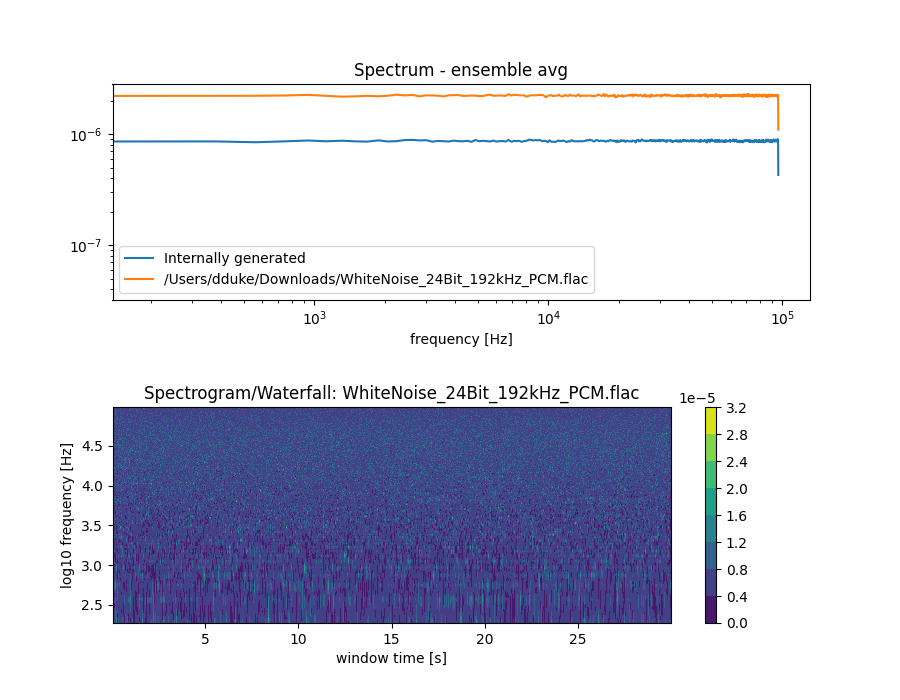

In [120]:
fig=plt.figure(figsize=(9,7))

ax=fig.add_subplot(211)
ax.loglog(f, Savg, label='Internally generated')
ax.loglog(fFlac, SavgFlac, label=filename)
plt.title('Spectrum - ensemble avg')
plt.xlabel('frequency [Hz]')
plt.legend()

ax=fig.add_subplot(212)
tt,ff = np.meshgrid(tFlac, np.log10(fFlac[1:]))
p_=ax.contourf(tt,ff,SFlac[1:,...])
plt.colorbar(p_)
plt.title('Spectrogram/Waterfall: '+os.path.basename(filename))
plt.ylabel('log10 frequency [Hz]')
plt.xlabel('window time [s]')

plt.subplots_adjust(hspace=.5);

## 4. Now try importing chirp

In [121]:
# Load file
filename='/Users/dduke/Downloads/' + 'Chirp_24Bit_192kHz_PCM.flac'
flacData, flacSampleRate = soundfile.read(filename)

# Compute spectrogram.
# - Defaults to a Tukey window with shape parameter of 0.25.
# - Default is no overlap. Set 1024 samples per window, so Nyquist condition gives 512 frequency bins.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html

fFlac,tFlac,SFlac = scipy.signal.spectrogram(flacData, fs=flacSampleRate, nperseg=1024)

print("There were %i windows evaluated in the spectrogram, each has %i frequency bands." % (SFlac.shape[1],SFlac.shape[0]))

# Ensemble-Average spectrum over all time record
SavgFlac = np.nanmean(SFlac, axis=1)

There were 6428 windows evaluated in the spectrogram, each has 513 frequency bands.


<IPython.core.display.Javascript object>


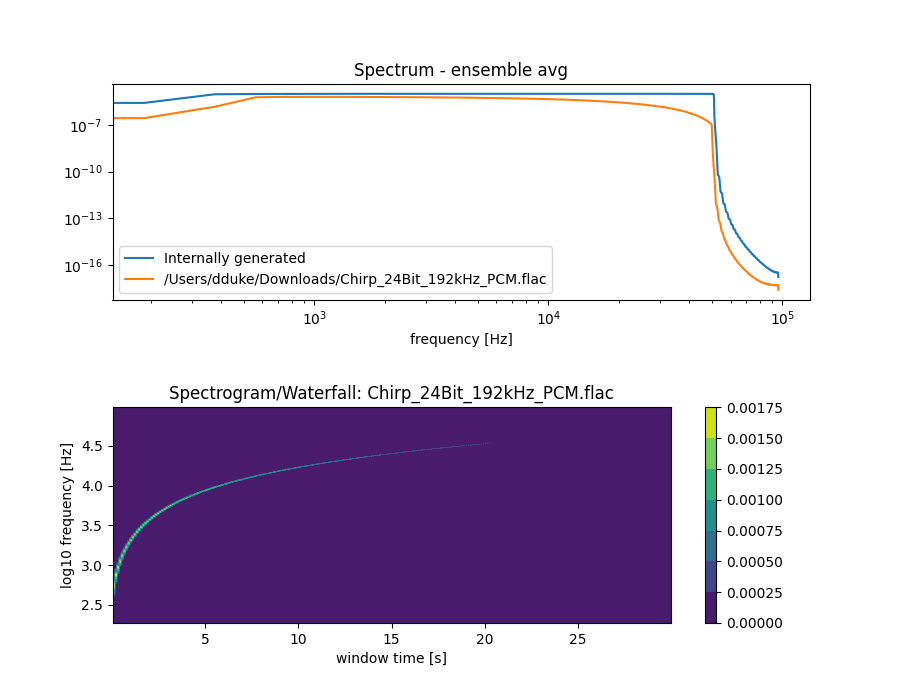

In [122]:
fig=plt.figure(figsize=(9,7))

ax=fig.add_subplot(211)
ax.loglog(fChirp, SavgChirp, label='Internally generated')
ax.loglog(fFlac, SavgFlac, label=filename)
plt.title('Spectrum - ensemble avg')
plt.xlabel('frequency [Hz]')
plt.legend()

ax=fig.add_subplot(212)
tt,ff = np.meshgrid(tFlac, np.log10(fFlac[1:]))
p_=ax.contourf(tt,ff,SFlac[1:,...])
plt.colorbar(p_)
plt.title('Spectrogram/Waterfall: '+os.path.basename(filename))
plt.ylabel('log10 frequency [Hz]')
plt.xlabel('window time [s]')

plt.subplots_adjust(hspace=.5);

We don't expect the lines in the graph above to perfectly overlap;  the amplitudes and rate of change of the chirp in time are different, but the sample rate, duration, start and end frequencies are about the same so they should be somewhat similar.